In [1]:
# Import Dependencies

# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("Resources/train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
##Exploratory Data Analysis

In [7]:
train.shape

(1460, 81)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


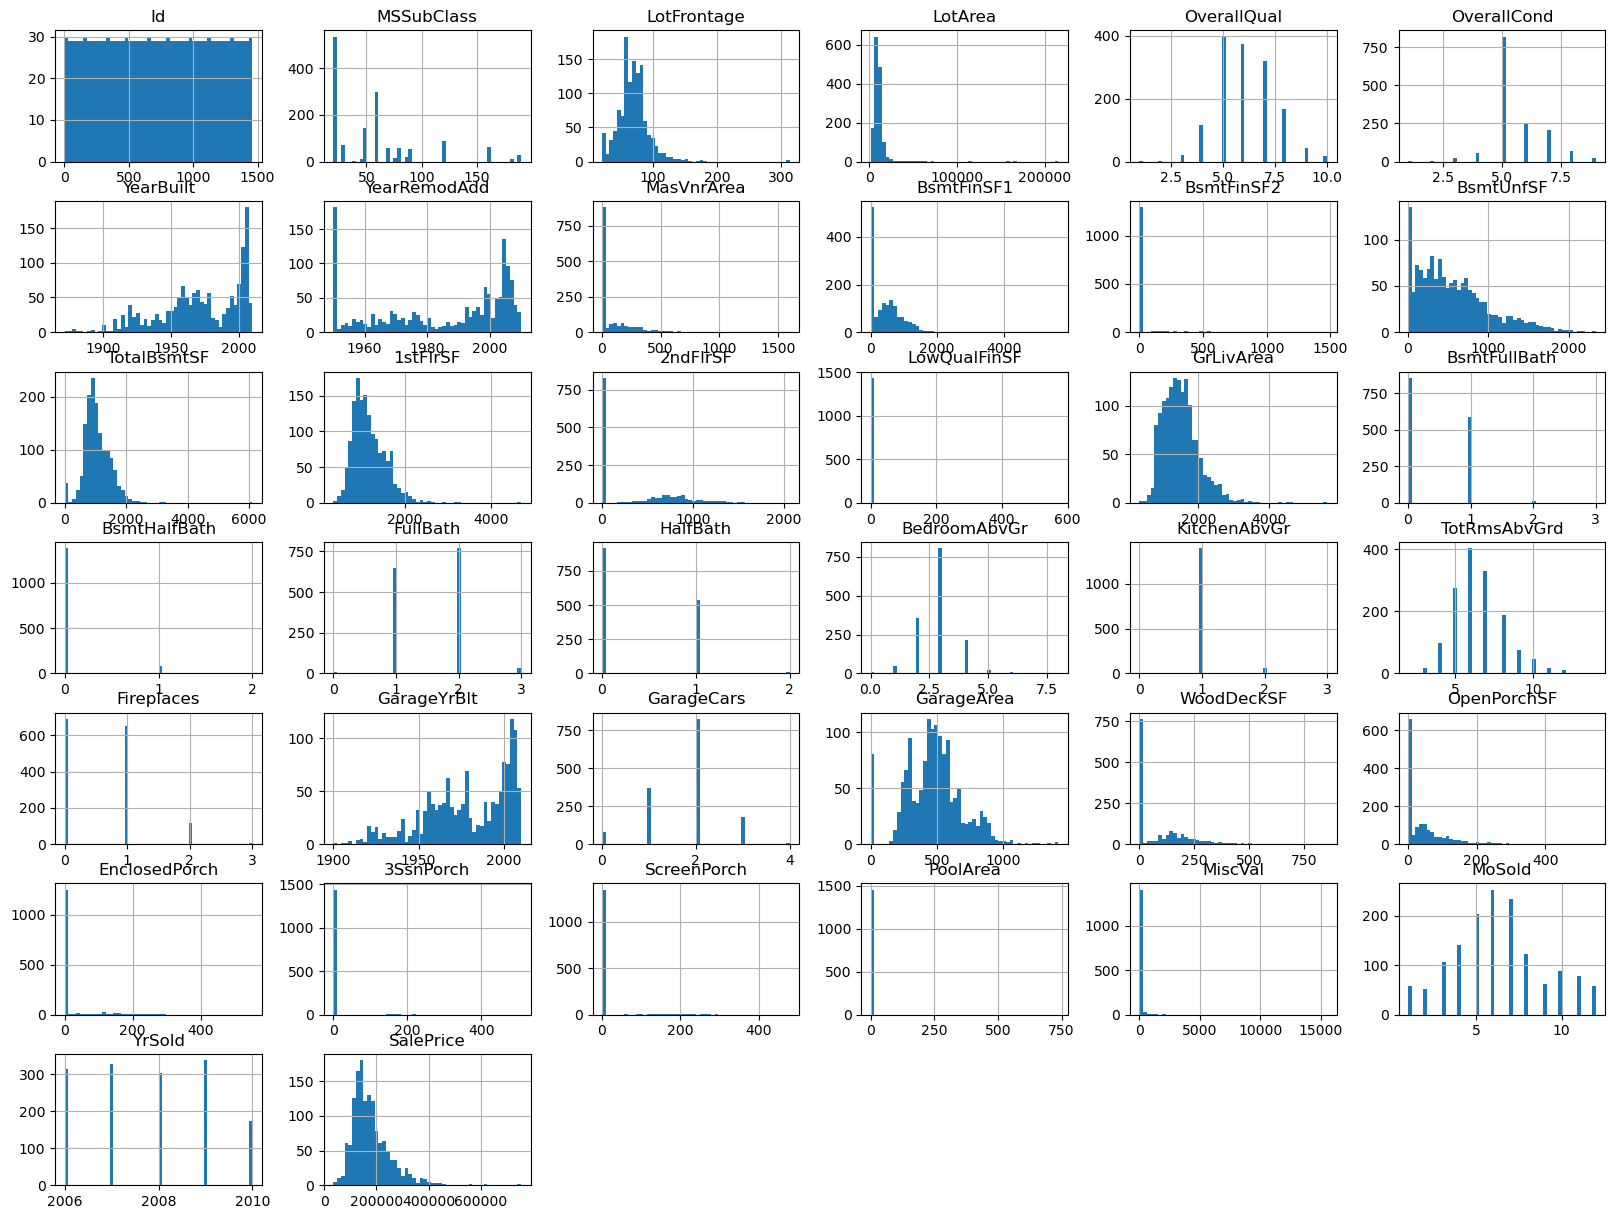

In [12]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
corr_matrix = train.corr()

In [14]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

The correlation coefficient ranges from –1 to 1.
When it is close to 1, it means that there is a strong positive correlation;
for example, the median Sales Price tends to go up when the Overall Quality goes up.

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='Sale

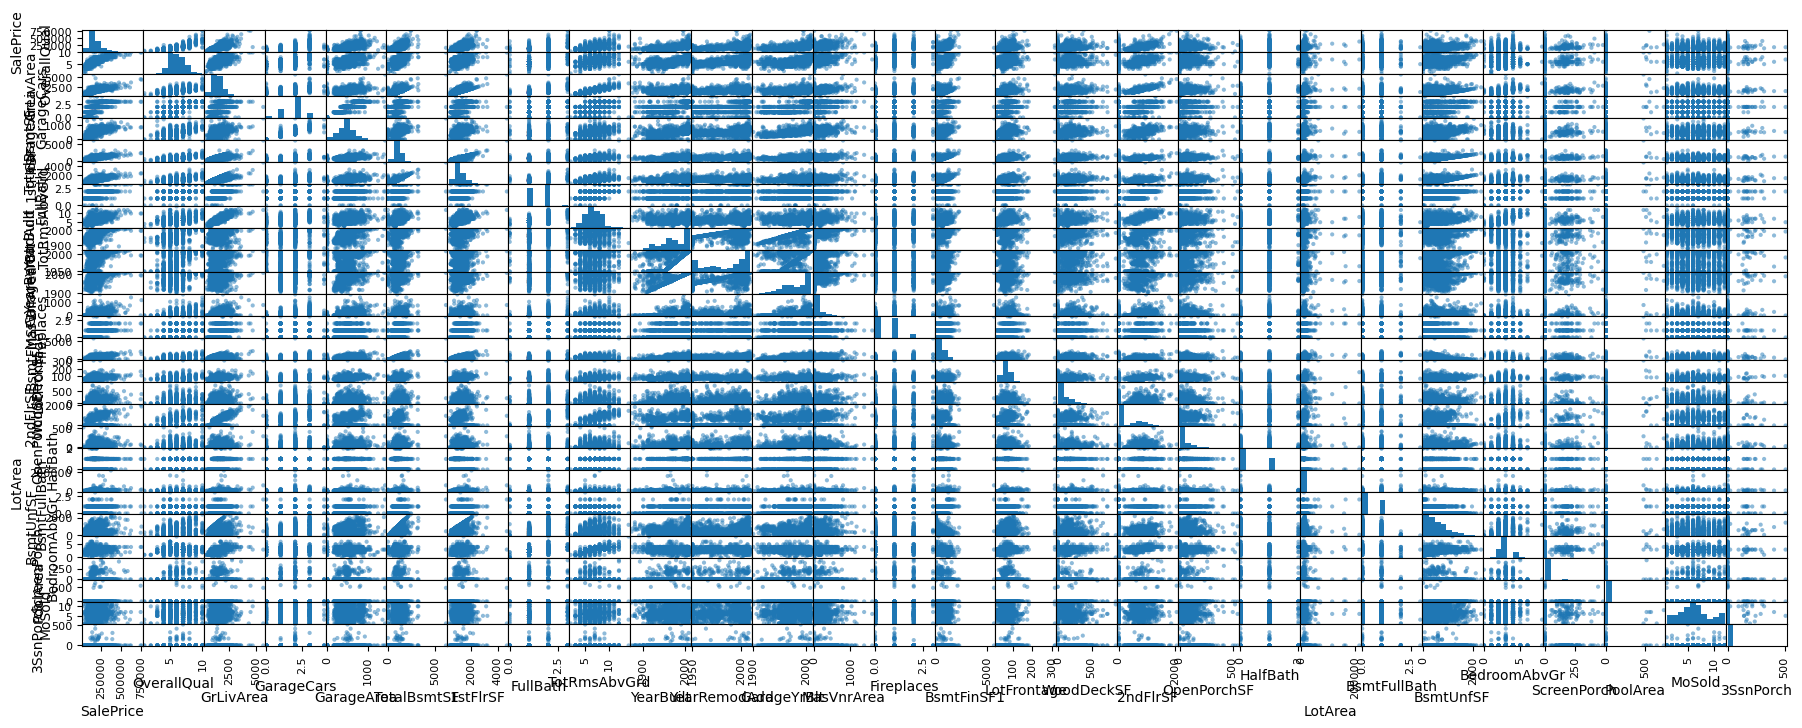

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea",
                  "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", 
                  "FullBath", "TotRmsAbvGrd", "YearBuilt",
                 "YearRemodAdd", "GarageYrBlt", 
                  "MasVnrArea", "Fireplaces","BsmtFinSF1", 
                  "LotFrontage", "WoodDeckSF", "2ndFlrSF",
                 "OpenPorchSF", "HalfBath", 
                  "LotArea","BsmtFullBath","BsmtUnfSF", "BedroomAbvGr", "ScreenPorch", 
                  "PoolArea", "MoSold", "3SsnPorch"]

scatter_matrix(train[attributes], figsize=(22, 8))

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

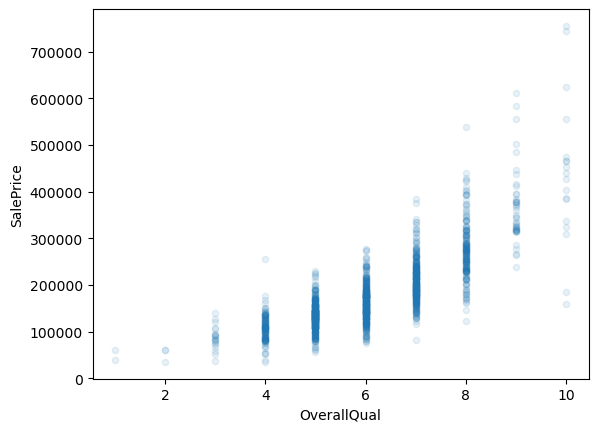

In [16]:
train.plot(kind="scatter", x="OverallQual", y="SalePrice",
                 alpha=0.1)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

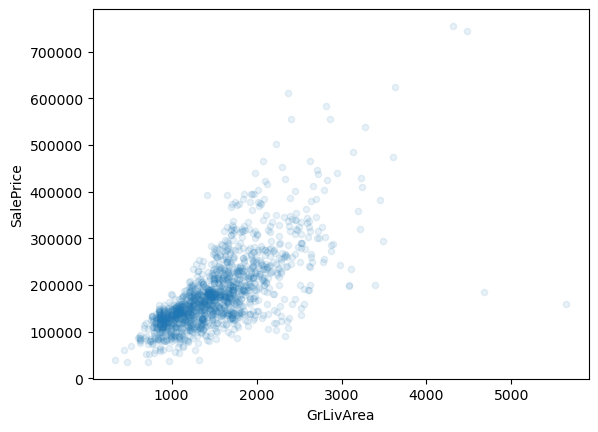

In [17]:
train.plot(kind="scatter", x="GrLivArea", y="SalePrice",
                 alpha=0.1)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

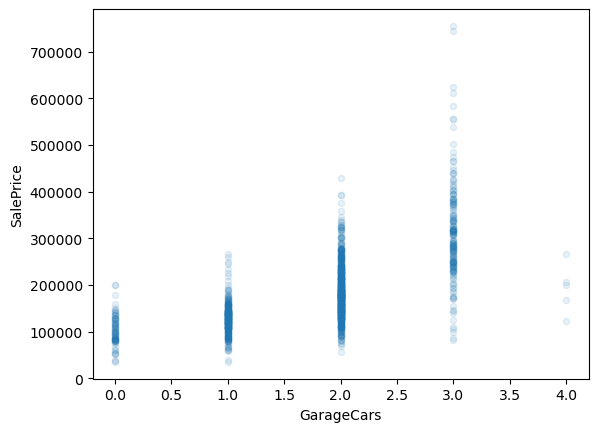

In [18]:
train.plot(kind="scatter", x="GarageCars", y="SalePrice",
                 alpha=0.1)

In [19]:
housing = train.drop("SalePrice", axis=1)
housing_label = train["SalePrice"]

In [20]:
# Dropping features whose attributes are >1000
features = []
nullValues = []
for i in housing:
    if (housing.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(housing.isna().sum()[i])
print(features)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [21]:
housing = housing.dropna(axis=1, how='any', thresh = 1000)

In [22]:
housing.shape

(1460, 75)

In [23]:
num_data = housing.select_dtypes(include = ['float', 'int64'])
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median') 
imputer.fit(num_data)
imputer.statistics_
num_data.median().values

array([7.3050e+02, 5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00,
       5.0000e+00, 1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02,
       0.0000e+00, 4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00,
       0.0000e+00, 1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9800e+03, 2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [25]:
X = imputer.transform(num_data)
num_data =pd.DataFrame(X , columns = num_data.columns)
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [26]:
cat_data = housing.select_dtypes(include = ['object'])
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [27]:
cat_data.shape

(1460, 38)

In [28]:
# Label encoding multiple columns
from sklearn.preprocessing import LabelEncoder
encoded_data = pd.DataFrame(columns = cat_data.columns , 
                       data = LabelEncoder().fit_transform(cat_data.values.flatten()).reshape(cat_data.shape))

In [29]:
housing_prepared = pd.concat([num_data , encoded_data], axis = 1)

In [30]:
housing_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories ='auto')
housing_cat_1hot = enc.fit_transform(cat_data)
housing_cat_1hot

<1460x245 sparse matrix of type '<class 'numpy.float64'>'
	with 55480 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self , feature_names):
        self._feature_names = feature_names
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X , y =None):
        return X[self._feature_names]

In [33]:
### Create a pipeline  then change the label encoder into one hot encoders
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attributes = list(num_data)
categorical_atrributes = list(cat_data)

num_pipeline = Pipeline( steps = [
    ('selector', FeatureSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('imput', OneHotEncoder(handle_unknown='ignore'))
])


full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', categorical_transformer)
])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_label, random_state=42)

In [35]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1023,1024.0,120.0,43.0,3182.0,7.0,5.0,2005.0,2006.0,14.0,16.0,...,136,71,154,17,60,149,149,166,158,111
810,811.0,20.0,78.0,10140.0,6.0,6.0,1974.0,1999.0,99.0,663.0,...,136,71,154,17,125,149,149,166,158,111
1384,1385.0,50.0,60.0,9060.0,6.0,5.0,1939.0,1950.0,0.0,204.0,...,136,149,154,50,155,149,149,117,158,111
626,627.0,20.0,69.0,12342.0,5.0,5.0,1960.0,1978.0,0.0,0.0,...,136,149,95,17,125,149,149,166,158,111
813,814.0,20.0,75.0,9750.0,6.0,6.0,1958.0,1958.0,243.0,608.0,...,136,149,154,17,125,149,149,166,34,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096.0,20.0,78.0,9317.0,6.0,5.0,2006.0,2006.0,0.0,24.0,...,136,71,154,17,125,149,149,166,158,111
1130,1131.0,50.0,65.0,7804.0,4.0,3.0,1928.0,1950.0,0.0,622.0,...,136,71,96,50,155,149,149,166,158,111
1294,1295.0,20.0,60.0,8172.0,5.0,7.0,1955.0,1990.0,0.0,167.0,...,136,149,154,50,155,149,149,101,158,111
860,861.0,50.0,55.0,7642.0,7.0,8.0,1918.0,1998.0,0.0,0.0,...,136,71,154,50,155,149,149,166,158,111


In [36]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
892,893.0,20.0,70.0,8414.0,6.0,8.0,1963.0,2003.0,0.0,663.0,...,136,149,154,17,125,149,149,166,158,111
1105,1106.0,60.0,98.0,12256.0,8.0,5.0,1994.0,1995.0,362.0,1032.0,...,136,71,154,17,125,149,149,166,158,111
413,414.0,30.0,56.0,8960.0,5.0,6.0,1927.0,1950.0,0.0,0.0,...,63,149,154,50,155,149,149,166,158,111
522,523.0,50.0,50.0,5000.0,6.0,7.0,1947.0,1950.0,0.0,399.0,...,136,149,154,50,155,149,149,166,158,111
1036,1037.0,20.0,89.0,12898.0,9.0,5.0,2007.0,2008.0,70.0,1022.0,...,136,53,154,17,60,149,149,166,158,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,989.0,60.0,69.0,12046.0,6.0,6.0,1976.0,1976.0,298.0,156.0,...,136,71,154,17,60,149,149,166,158,111
243,244.0,160.0,75.0,10762.0,6.0,6.0,1980.0,1980.0,0.0,0.0,...,136,149,154,17,125,149,149,166,158,111
1342,1343.0,60.0,69.0,9375.0,8.0,5.0,2002.0,2002.0,149.0,0.0,...,136,71,154,17,125,149,149,166,158,111
1057,1058.0,60.0,69.0,29959.0,7.0,6.0,1994.0,1994.0,0.0,595.0,...,136,71,154,31,60,149,149,166,158,111


In [37]:
# MACHINE LEARNING MODELS

In [38]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
housing_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

43867.27810132717

In [40]:
# USING CROSSVALIDATION

In [41]:
from sklearn.model_selection import cross_val_score
scores_tr = cross_val_score(tree_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores_tr = np.sqrt(-scores_tr)

scores_ts = cross_val_score(tree_reg, X_test, housing_predictions,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores_ts = np.sqrt(-scores_ts)

In [42]:
    def display_scores(scores):
    
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores_tr)

Scores: [54473.34171918 47314.93524968 39234.83364736 39579.82536321
 52422.49944485 40154.72951922 41637.48873058 35945.44950887
 39569.55838251 35243.05000287]
Mean: 42557.57115683275
Standard deviation: 6281.82503933266


In [43]:
display_scores(tree_rmse_scores_ts)

Scores: [35955.58588149 65925.10299575 55063.03506302 69050.23809067
 42864.4151041  43215.38841309 33933.9847584  59273.58605066
 44979.57704861 52925.96406171]
Mean: 50318.68774675017
Standard deviation: 11459.556851790745


In [44]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
housing_predictions = forest_reg.predict(X_test)
forest_rmse = mean_squared_error(y_test, housing_predictions)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse

27052.62172504326

In [46]:
from sklearn.model_selection import cross_val_score
scores_tr = cross_val_score(forest_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores_tr = np.sqrt(-scores_tr)

scores_ts = cross_val_score(forest_reg, X_test, housing_predictions,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores_ts = np.sqrt(-scores_ts)

In [47]:
def display_scores(scores):
    
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())


display_scores(forest_rmse_scores_tr)

Scores: [37797.32720426 24146.6951227  39834.8894099  41627.50090671
 34905.17025181 27850.26025883 28112.57374247 25277.01725761
 27196.74221085 23134.88338165]
Mean: 30988.30597468037
Standard deviation: 6532.648237842627


In [48]:
display_scores(forest_rmse_scores_ts)

Scores: [11581.81774945 12480.58221581 17913.63705937 32605.05287808
 21868.33538762 17269.97779551 15235.53501129 14366.45582177
 11478.89197222 11557.87651214]
Mean: 16635.81624032527
Standard deviation: 6218.759980150557


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


GradientBoostingRegressor()

In [50]:
housing_predictions = gbr.predict(X_test)
gbr_rmse = mean_squared_error(y_test, housing_predictions)
gbr_rmse = np.sqrt(gbr_rmse)
gbr_rmse

26844.4257119428

In [51]:
from sklearn.model_selection import cross_val_score
scores_tr = cross_val_score(gbr, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
gbr_rmse_scores_tr = np.sqrt(-scores_tr)

scores_ts = cross_val_score(gbr, X_test, housing_predictions,
                             scoring="neg_mean_squared_error", cv=10)
gbr_rmse_scores_ts = np.sqrt(-scores_ts)


In [52]:
def display_scores(scores):
    
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())


display_scores(gbr_rmse_scores_tr)

Scores: [41876.60593535 21022.35973474 36536.43758984 33991.88054382
 31719.35651279 27658.8365508  25259.75340861 22863.12840584
 24589.74702822 20852.29666525]
Mean: 28637.040237525354
Standard deviation: 6756.691108144087


In [53]:
display_scores(gbr_rmse_scores_ts)

Scores: [10790.21224785 11565.24131984 18049.7203728  45686.77562006
 19659.02396899 11961.13821742 18241.5436133  16654.77239851
 11464.06197827 13768.00260937]
Mean: 17784.049234641658
Standard deviation: 9804.067055242589


In [54]:
# Finetuning Model Using Grid Search

In [55]:
import time
from sklearn.model_selection import GridSearchCV

def model_pipeline(model, param_grid, scoring):
    grid_search = GridSearchCV(
        estimator=model, param_grid=param_grid, scoring=scoring, cv=5
    )

    # Fit model & Time the process for training the model
    print("running model")
    start_time = time.process_time()

    grid_search.fit(X_train, y_train)

    # End of fit time
    print(time.process_time() - start_time, "Seconds")
    print("finished running model")
    return grid_search


# Generate results of best run


def plot_mean_scores(grid_search, col, x, y, name):

    Results = pd.DataFrame(grid_search.cv_results_)
    Results_Best = Results.loc[Results.rank_test_score == 1]

    # Initialize a grid of plots
    sns.set(font_scale=1.5)
    sns.set_style("darkgrid")
    col = col
    for col in col:
        grid = sns.FacetGrid(
            Results,
            col=col,
            hue="rank_test_score",
            palette="tab20c",
            legend_out=False,
            col_wrap=5,
            height=15,
        )

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, y=0, ls=":", c=".5")

        # Draw marker on plot and decide what parameters to plot
        grid.map(sns.scatterplot, x, y, marker="x", s=200)

        # Adjust the arrangement of the plots
        grid.fig.tight_layout(w_pad=1)

        # Add legend to gird
        grid.add_legend()

    grid.savefig(name)

running model
0.30524400000000185 Seconds
finished running model


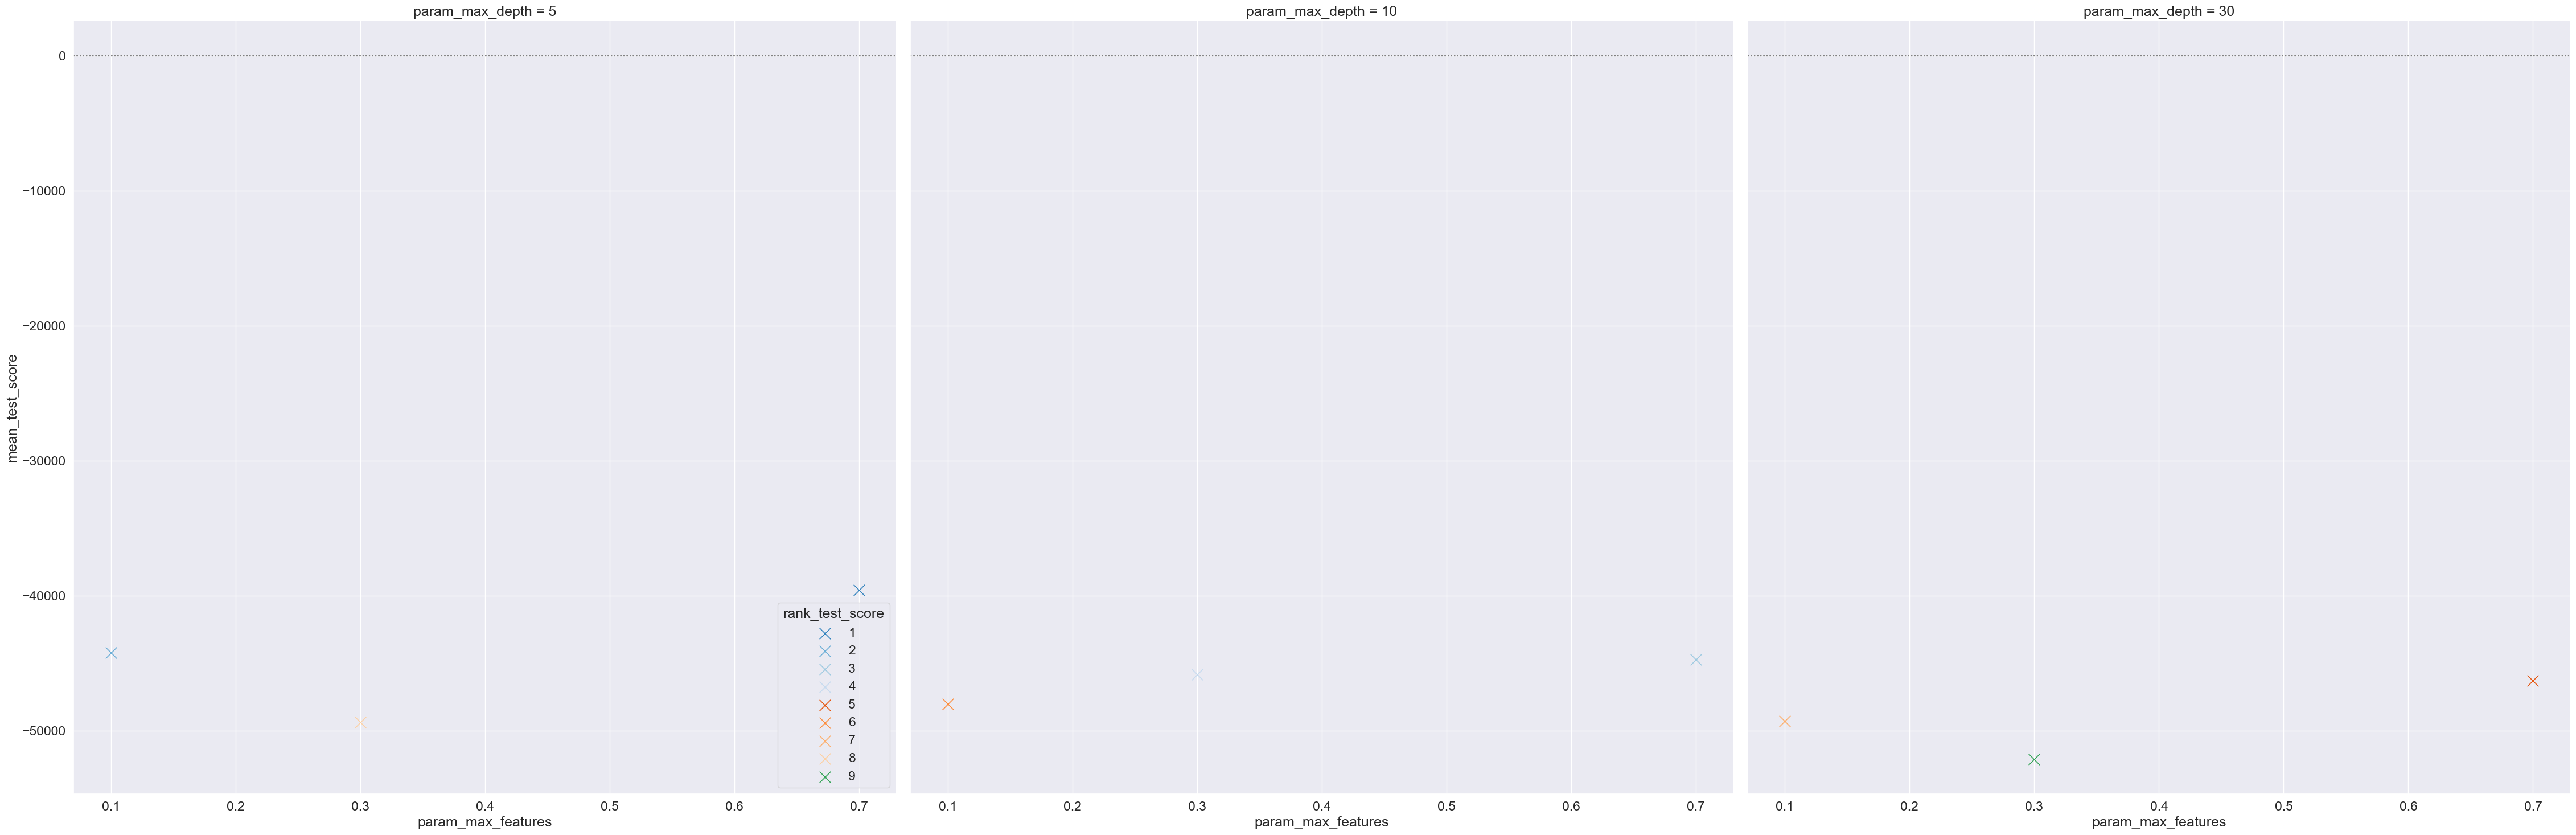

In [56]:
# Modelling

# Build a decision tree
# Set paramters for Grid Search CV
param_grid = {
    "max_depth": [5, 10, 30],
    "max_features": [0.1, 0.3, 0.7],
}
tree_reg = DecisionTreeRegressor(criterion="squared_error", random_state=0)

grid_search = model_pipeline(tree_reg, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    grid_search,
    ["param_max_depth"],
    "param_max_features",
    "mean_test_score",
    "DecisionTree",
)

running model
35.098087 Seconds
finished running model


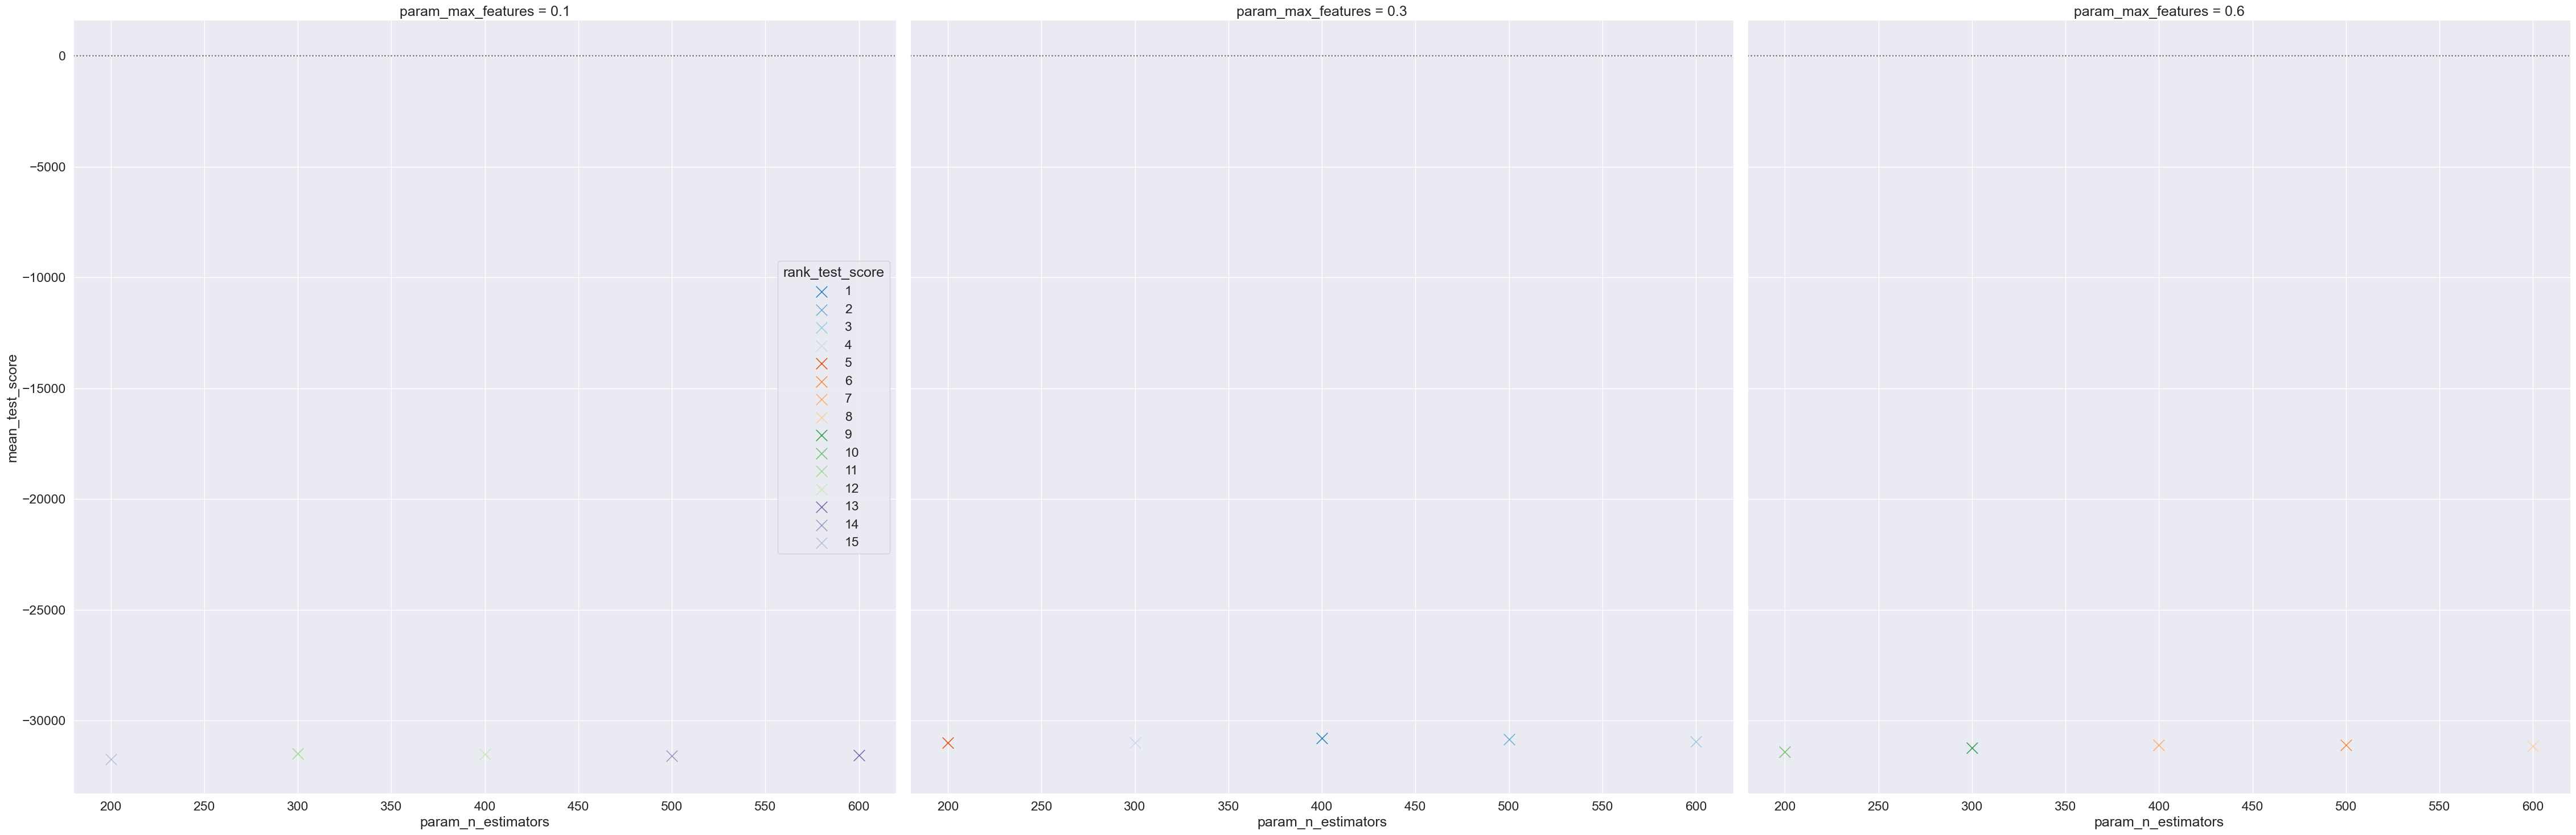

In [57]:
# Set paramters for Grid Search
param_grid = {
    "n_estimators": [200, 300, 400, 500, 600],
    "max_features": [0.1, 0.3, 0.6],
}
# Initialise the random forest model
forest_rmse = RandomForestRegressor(n_jobs=-1, random_state=0, bootstrap=True)

grid_search = model_pipeline(forest_rmse, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    grid_search,
    ["param_max_features"],
    "param_n_estimators",
    "mean_test_score",
    "RandomForest",
)

running model
98.52904900000001 Seconds
finished running model


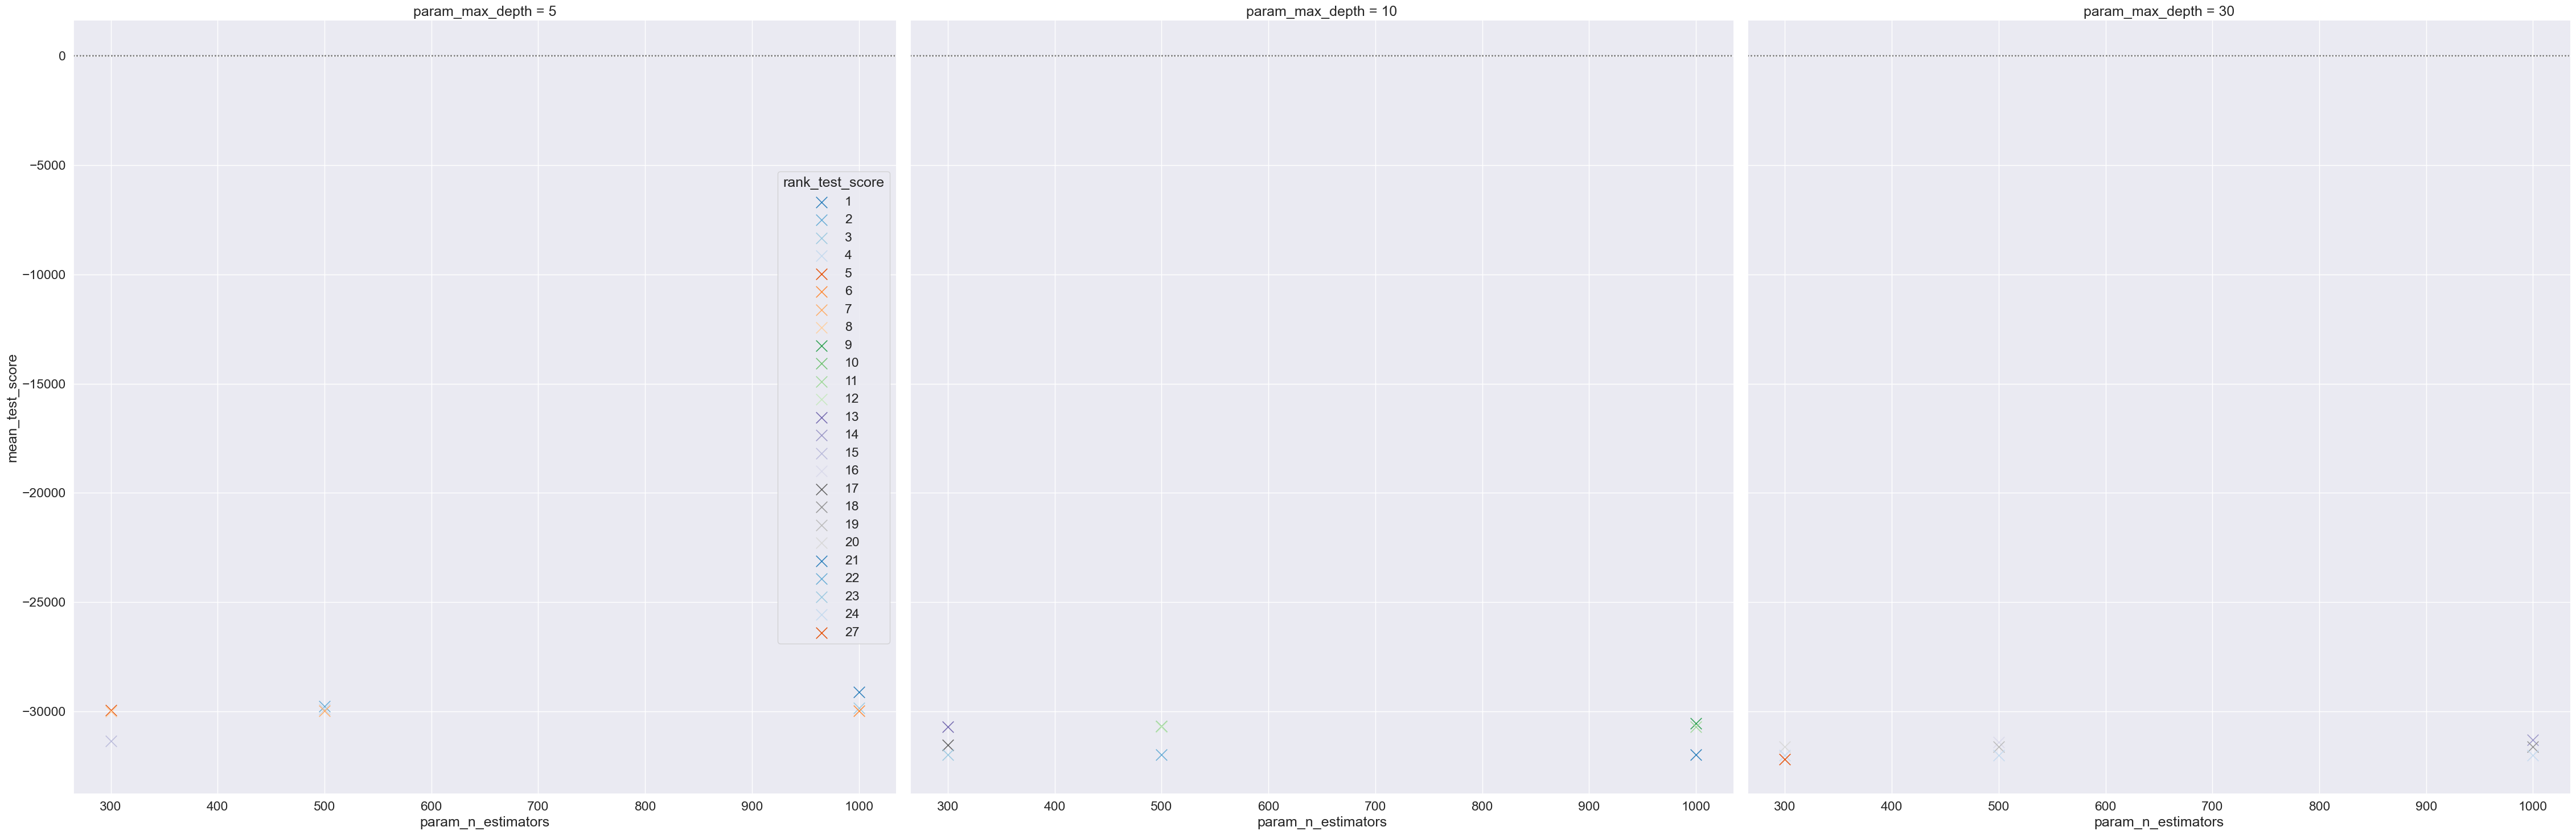

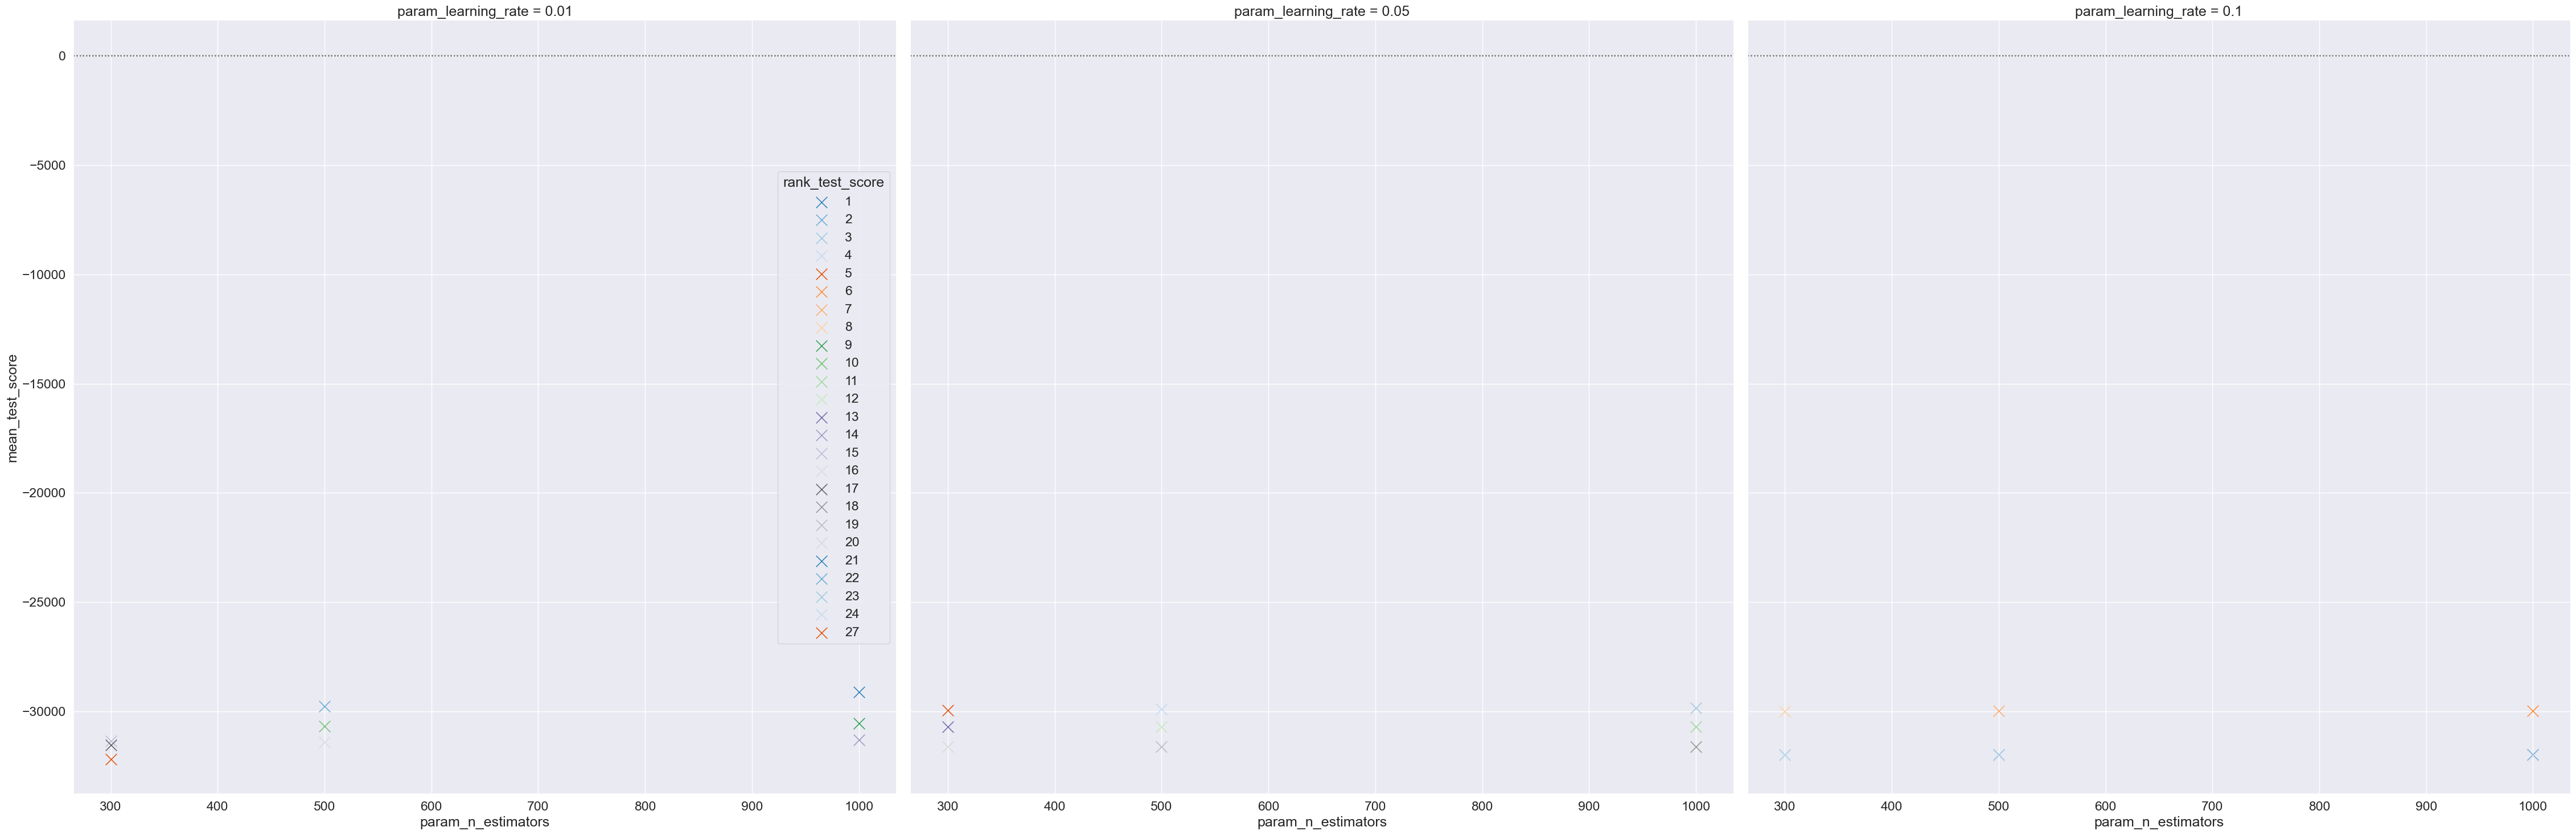

In [58]:
 #Gradient Boosting Regressor


# Set paramters for Grid Search CV
param_grid = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [5, 10, 30],
    "learning_rate": [0.01, 0.05, 0.1],
}
gbr = GradientBoostingRegressor(random_state=0, max_features="sqrt")

grid_search = model_pipeline(gbr, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    grid_search,
    ["param_max_depth", "param_learning_rate"],
    "param_n_estimators",
    "mean_test_score",
    "GradientBoosting",
)

In [87]:
grid_search.best_params_ 

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}

In [83]:
grid_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          n_estimators=1000, random_state=0)

In [88]:
GB = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          n_estimators=1000, random_state=0)

In [89]:
GB.fit(X_train, y_train)
housing_predictions = GB.predict(X_test)

housing_predictions = np.reshape(housing_predictions, -1)

In [101]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1023,1024.0,120.0,43.0,3182.0,7.0,5.0,2005.0,2006.0,14.0,16.0,...,136,71,154,17,60,149,149,166,158,111
810,811.0,20.0,78.0,10140.0,6.0,6.0,1974.0,1999.0,99.0,663.0,...,136,71,154,17,125,149,149,166,158,111
1384,1385.0,50.0,60.0,9060.0,6.0,5.0,1939.0,1950.0,0.0,204.0,...,136,149,154,50,155,149,149,117,158,111
626,627.0,20.0,69.0,12342.0,5.0,5.0,1960.0,1978.0,0.0,0.0,...,136,149,95,17,125,149,149,166,158,111
813,814.0,20.0,75.0,9750.0,6.0,6.0,1958.0,1958.0,243.0,608.0,...,136,149,154,17,125,149,149,166,34,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096.0,20.0,78.0,9317.0,6.0,5.0,2006.0,2006.0,0.0,24.0,...,136,71,154,17,125,149,149,166,158,111
1130,1131.0,50.0,65.0,7804.0,4.0,3.0,1928.0,1950.0,0.0,622.0,...,136,71,96,50,155,149,149,166,158,111
1294,1295.0,20.0,60.0,8172.0,5.0,7.0,1955.0,1990.0,0.0,167.0,...,136,149,154,50,155,149,149,101,158,111
860,861.0,50.0,55.0,7642.0,7.0,8.0,1918.0,1998.0,0.0,0.0,...,136,71,154,50,155,149,149,166,158,111


In [106]:
y_test.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

In [90]:
housing_predictions

array([140871.10881792, 325577.31497459, 110867.15465622, 155851.26807765,
       326279.43857596,  78838.66955481, 223007.48981626, 143939.78302929,
        79873.56805606, 132617.20492542, 146580.33120293, 122146.25945112,
       133929.13550314, 199508.18374508, 172179.14775983, 131819.45864635,
       193304.61545067, 132985.5751116 , 117317.85740925, 218593.40891965,
       163874.11523883, 225858.51530017, 180337.34660398, 131280.46917959,
       204941.71620955, 174191.6524784 , 187591.99883243, 105476.42344091,
       178165.60441548, 195722.69778723, 131463.68723386, 269615.31400755,
       224027.2489293 , 111292.06044478, 261484.92162708, 147024.70297382,
       135678.44294615, 205509.08159361, 329243.56981813, 105369.75693348,
       128544.99469358, 235866.70106695, 116363.66422264, 384316.75766682,
       128321.39705442, 138865.91165566, 109522.88103074, 126736.47922633,
       426696.37216992, 135605.58125407, 122180.10637218, 201641.68137945,
       121163.92425623, 3

In [125]:
house_price_predictions = pd.DataFrame({"id":X_test.Id, "SalePrice":housing_predictions})

house_price_predictions.to_csv('price_predictions.csv', index=False)

In [127]:
predictions = pd.read_csv('price_predictions.csv')

In [131]:
y_test.to_csv('given_price.csv' , index=False)

In [132]:
given_price = pd.read_csv('given_price.csv')

In [133]:
predictions["given_price"] = given_price

In [134]:
predictions.head()

,id,SalePrice,given_price
0,893.0,140871.108818,154500
1,1106.0,325577.314975,325000
2,414.0,110867.154656,115000
3,523.0,155851.268078,159000
4,1037.0,326279.438576,315500


In [135]:
predictions.to_csv('results.csv', index=False)